1. Gerekli kütüphaneler

In [1]:
# 🌟 Veri işleme ve analiz için temel kütüphaneler
import pandas as pd  # Veri okuma, işleme ve DataFrame oluşturma işlemleri için

# 🌳 Karar Ağacı Modeli oluşturma ve eğitim için
from sklearn.tree import DecisionTreeClassifier  # Karar Ağacı sınıflandırma modeli oluşturmak için

# 📊 Model performans değerlendirmesi ve doğrulama metrikleri
from sklearn.metrics import classification_report  # Precision, Recall, F1-score gibi performans metriklerini elde etmek için
from sklearn.metrics import confusion_matrix  # Sınıflandırma modellerinde gerçek ve tahmin değerlerini karşılaştırmak için
from sklearn.metrics import roc_auc_score  # ROC eğrisi altında kalan alanı (AUC) hesaplamak için
from sklearn.metrics import roc_curve  # ROC eğrisi verilerini hesaplamak için (TPR ve FPR)

# 📈 Grafiksel görselleştirme ve analiz için
import matplotlib.pyplot as plt  # Grafik ve görselleştirme oluşturmak için
import seaborn as sns  # Estetik görseller ve gelişmiş grafik stilleri için

# ⚖️ Sınıf dengesizlik sorununu çözmek için SMOTE yöntemi
from imblearn.over_sampling import SMOTE  # Azınlık sınıfını çoğaltarak sınıf dengesizliğini gidermek için

# 🧮 Sınıf dağılımını analiz etmek ve saymak için
from collections import Counter  # Verideki sınıfların dağılımını sayısal olarak göstermek için

2. Veriyi okuma

In [2]:
# Eğitim ve test verilerini oku
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

# Özellik ve hedef ayır (✅ doğru hedef sütunu kullanılıyor)
X_train = train_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

X_test = test_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

print("✅ Eğitim verisi:", X_train.shape)
print("✅ Test verisi:", X_test.shape)
print("🎯 Sınıf dağılımı (y_train):\n", y_train.value_counts())

✅ Eğitim verisi: (1007, 23)
✅ Test verisi: (252, 23)
🎯 Sınıf dağılımı (y_train):
 support_needed
0    528
1    479
Name: count, dtype: int64


3. SMOTE ile veri dengeleme

In [3]:
# 🔄 SMOTE ile dengeleme
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("🎯 Yeni sınıf dağılımı:", Counter(y_train_balanced))

🎯 Yeni sınıf dağılımı: Counter({0: 528, 1: 528})


4. Karar Ağacı modeli

In [4]:
# Modeli oluştur ve eğit
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

5. Tahmin

In [5]:
# Tahminler
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

6. Değerlendirme

📋 Sınıflandırma Raporu (Decision Tree):

              precision    recall  f1-score   support

           0      0.945     0.909     0.927       132
           1      0.904     0.942     0.922       120

    accuracy                          0.925       252
   macro avg      0.924     0.925     0.925       252
weighted avg      0.925     0.925     0.925       252



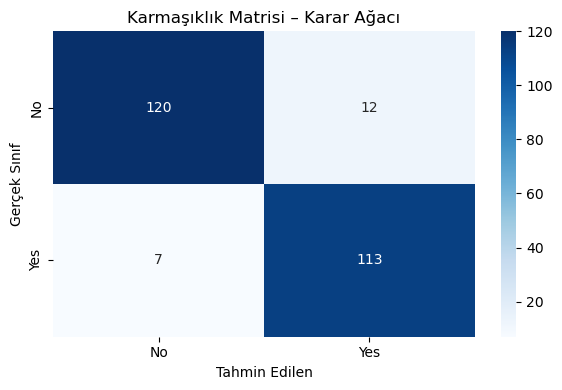

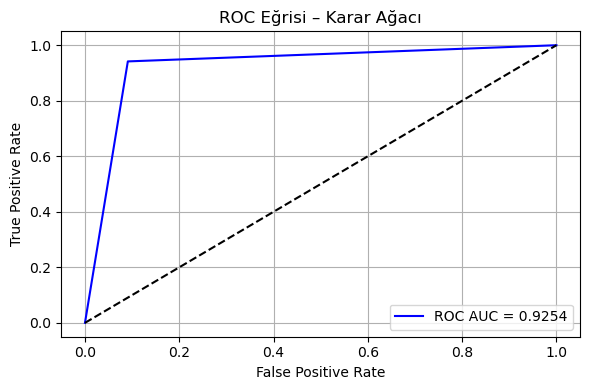

In [6]:
# 📋 Sınıflandırma raporu
print("📋 Sınıflandırma Raporu (Decision Tree):\n")
report = classification_report(y_test, y_pred, digits=3)  # 3 basamak hassasiyeti
print(report)

# 🔍 Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – Karar Ağacı")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# 🌈 ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – Karar Ağacı")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

7. Model kaydı

In [10]:
import joblib

# model.save("../saved_model/normal/mental_dt_model.keras")
joblib.dump(model, "../saved_model/normal/mental_dt_model.pkl")

print("💾 Model başarıyla kaydedildi:")
print("- mental_dt_model.pkl")

💾 Model başarıyla kaydedildi:
- mental_dt_model.pkl
